# PJ01: Are students who believe the skills learned in the class were valuable more likely to be COMP majors?

Students choose to take courses for a variety of reasons. For example, a student may have chosen to take COMP 110 solely to fulfill a general education requirement while others do so to fulfill a requirement. I seek to investigate potential correlation between a student's perception of the value of the skills learned in COMP and whether or not they are COMP majors.

In order to analytically explore this question, we must first read in the csv file containing the data and convert it into column-oriented data in order to make it easier to work with. We use the columnar function which converts the row-oriented data into column-oriented and prints the names of the keys in the dictionary.

In [123]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)


The key is 0.
The key is row_number.
The key is year.
The key is unc_status.
The key is comp_major.
The key is primary_major.
The key is prereqs.
The key is prior_exp.
The key is AP_Principles.
The key is AP_A.
The key is other_comp.
The key is prior_time.
The key is languages.
The key is residency.
The key is on_campus.
The key is international.
The key is section.
The key is lesson_time.
The key is sync_perf.
The key is all_sync.
The key is own_notes.
The key is own_examples.
The key is oh_visits.
The key is ls_effective.
The key is lsqs_effective.
The key is programming_effective.
The key is qz_effective.
The key is oh_effective.
The key is tutoring_effective.
The key is kaki_effective.
The key is pace.
The key is difficulty.
The key is understanding.
The key is interested.
The key is valuable.
The key is would_recommend.


## Filtering the Data

Now, we select the data columns we want to work with. In this case, we want to work with the `comp_major` and `valuable` columns. Further, let's just use the first 300 rows of data. For this, we use the `head` function which is defined in the `data_utils` file.

In [124]:
from data_utils import select, head

selected_data: dict[str, list[str]] = select(columns, ["comp_major", "valuable"])
selected_data_300: dict[str, list[str]] = head(selected_data, 300)

Let's filter the data more to more closely examine the correlation between perception of value of the skills learned and whether or not the students are COMP majors or not. The `filter_high_valuable` function returns a list of reponses from students who rated the value of the skills learned in the course at a 5 or above. Function `filter_low_valuable` returns a list of responses from students who gave a rating of 4 or below.

In [125]:
def filter_high_valuable(data: dict[str, list[str]]) -> list[str]:
    major_high_valuable: list[str] = []
    i: int = 0
    valuable_values: list[str] = data["valuable"]
    major_values: list[str] = data["comp_major"]
    while i < len(valuable_values):
        if valuable_values[i] == '7' or valuable_values[i] == '6' or valuable_values == '5':
            major_high_valuable.append(major_values[i])
        i += 1
    return major_high_valuable

def filter_low_valuable(data: dict[str, list[str]]) -> list[str]:
    major_low_valuable: list[str] = []
    i: int = 0
    valuable_values: list[str] = data["valuable"]
    major_values: list[str] = data["comp_major"]
    while i < len(valuable_values):
        if valuable_values[i] == '1' or valuable_values[i] == '2' or valuable_values[i] == '3' or valuable_values[i] == '4':
            major_low_valuable.append(major_values[i])
        i += 1
    return major_low_valuable

filtered_data_high = filter_high_valuable(selected_data_300)
filtered_data_low = filter_low_valuable(selected_data_300)

## Results  

Now, we call the `count` function defined in `data_utils` to count the number of responses for the `comp_major` column. `major_counts_high_value` gives the data table (`dict[str, list[str]])`) for the students who rated the value of the skills learned in COMP 110 at a 5 or above. `major_counts_low _value` does the same thing but for students who gave ratings of 4 or below.

In [126]:
from data_utils import count

major_counts_high_value: dict[str, list[str]] = count(filtered_data_high)
print(f"major_counts_high_value: {major_counts}")

major_counts_low_value: dict[str, list[str]] = count(filtered_data_low)
print(f"major_counts_low_value: {major_counts_low_value}")

major_counts_high_value: {'No': 113, 'Yes - Minor': 27, 'Yes - BA': 23, 'Yes - BS': 24}
major_counts_low_value: {'No': 49, 'Yes - Minor': 4, 'Yes - BS': 3, 'Yes - BA': 3}


### Figures

<BarContainer object of 4 artists>

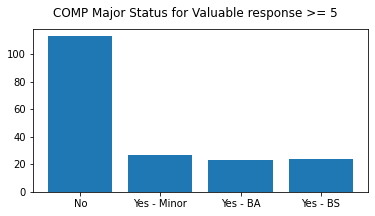

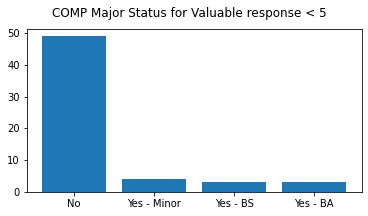

In [144]:
import matplotlib.pyplot as plt

data = major_counts_high_value 
names = list(data.keys())
values = list(data.values())

plt.figure(figsize=(6, 3))
plt.suptitle('COMP Major Status for Valuable response >= 5')
plt.bar(names, values)

data_1 = major_counts_low_value
names_1 = list(data_1.keys())
values_1 = list(data_1.values())

plt.figure(figsize=(6, 3))
plt.suptitle('COMP Major S3tatus for Valuable response < 5')
plt.bar(names_1, values_1)

These bar plots show the COMP major status of students who responded with a `valuable` value of 5 or greater and less than 5. These data visualizations can help us more easily see the results of our data. 

## Conclusions

In order to potentially answer the question posed for this data analysis project, I examined the `comp_major` and `valuable` columns. I filtered this data further to only use the first 300 responses and wrote two functions that returned dictionaries conditionally based on the value of `valuable` for each response. The count function returned a frequency table of the reponses for the students who viewed the skills learned in COMP 110 as valuable and those who perceived them as not very valuable. Looking at these results and the figures constructed, we can calculate the conditional probability that a student will be a COMP major given that they rate COMP 110 skills highly or lowly. 

\begin{equation}
P(comp\_major \mid valuable >= 5) = .396
\end{equation}

\begin{equation}
P(comp\_major \mid valuable < 5) = .169
\end{equation}

While these probability values suggest that there may be strong correlation between being a comp major and rating the skills learned highly, this statistical analysis is not enough to draw a sound conclusion. Keeping this in mind, it still makes sense that COMP majors would value intro programming skills highly while non-major who may be taking the class to fulfil a gen-ed requirement may not. One interesting thing to note is that overall, more people valued the COMP 110 skills highly regardless of their status as a COMP major. This shows that many see programming as an important skill no matter what fields they pursue
